# Ecommerce Dataset Analysis: Unveiling Insights for Strategic Decision-Making


## Introduction:
 This report presents an analysis of the Amazon Sales Dataset. The dataset contains information about various products, including their attributes, customer reviews, and sales data. The analysis aims to uncover patterns, trends, and relationships within the data to inform strategic decision-making and improve overall business performance.

## Dataset Overview:
The dataset comprises several columns, including:

- Product attributes such as product ID, name, category, prices, discount percentage, and rating.
- Customer reviews, including user ID, review ID, review title, review content, and user name.
- Additional information, such as about the product, image links, and product links.

## Data Preprocessing


In [3]:
import pandas as pd
from collections import Counter
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset into a pandas DataFrame
ecommerce_data = pd.read_csv('amazon.csv')
pd.set_option('display.max_colwidth', 80)
ecommerce_data.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Charging and Data Sync Cable Comp...,Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBC...,₹399,"₹1,099",64%,4.2,"24,269","High Compatibility : Compatible With iPhone 12, 11, X/XsMax/Xr ,iPhone 8/8 P...","AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBBSNLYT3ONILA,AHCTC6ULH4XB6YHDY6...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jaspreet singh,Khaja moin,Anand,S....","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1KD19VHEDV0OR,R3C02RMYQMK6FC,R39...","Satisfied,Charging is really fast,Value for money,Product review,Good qualit...","Looks durable Charging is fine tooNo complains,Charging is really fast, good...",https://m.media-amazon.com/images/W/WEBP_402378-T1/images/I/51UsScvHQNL._SX3...,https://www.amazon.in/Wayona-Braided-WN3LG1-Syncing-Charging/dp/B07JW9H4J1/r...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5m Braided Type C Cable for Sma...,Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBC...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be it an android smartphone (Mi,...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBXNGXZJT525AQ,AHONIZU3ICIEHQIGQ6...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Placeholder,BharanI,sonia,Niam","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RYGGS0M09S3KY,R17KQRUTAN5DKS,R3A...","A Good Braided Cable for Your Type C Device,Good quality product from ambran...",I ordered this cable to connect my phone to Android Auto of car. The cable i...,https://m.media-amazon.com/images/W/WEBP_402378-T2/images/I/31zOsqQOAOL._SY4...,https://www.amazon.in/Ambrane-Unbreakable-Charging-Braided-Cable/dp/B098NS6P...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync USB Cable Compatible for iPhone...,Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBC...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safety proctections and four-core c...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQLWQOWZ4N3OA,AHTPQRIMGUD4BYR5YI...","Kunal,Himanshu,viswanath,sai niharka,saqib malik,Aashiq,Ramu Challa,Sanjay g...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R25X4TBMPY91LX,R27OK7G99VK0TR,R2...","Good speed for earlier versions,Good Product,Working good,Good for the price...","Not quite durable and sturdy,https://m.media-amazon.com/images/W/WEBP_402378...",https://m.media-amazon.com/images/W/WEBP_402378-T1/images/I/31IvNJZnmdL._SY4...,https://www.amazon.in/Sounce-iPhone-Charging-Compatible-Devices/dp/B096MSW6C...
3,B08HDJ86NZ,"boAt Deuce USB 300 2 in 1 Type-C & Micro USB Stress Resistant, Tangle-Free, ...",Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBC...,₹329,₹699,53%,4.2,"94,363","The boAt Deuce USB 300 2 in 1 cable is compatible with smartphones, tablets,...","AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5SGCUQBP7YSCA,AH725ST5NW2Y4JZPKU...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh chouhan,Ravi Siddan,Himanshu G...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1CLH2ULIVG5U3,R2DMKIBGFKBD6R,RC...","Good product,Good one,Nice,Really nice product,Very first time change,Good,F...","Good product,long wire,Charges good,Nice,I bought this cable for Rs.339 wort...",https://m.media-amazon.com/images/I/41V5FtEWPkL._SX300_SY300_QL70_FMwebp_.jpg,https://www.amazon.in/Deuce-300-Resistant-Tangle-Free-Transmission/dp/B08HDJ...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 Pin USB Cable with Charge & Syn...,Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBC...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes with charging & Data sync functio...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZHM4QB2KPKFUQ,AFK4NJOLFSJGWLOJIU...","rahuls6099,Swasat Borah,Ajay Wadke,Pr

## Cleaning up Data
To clean the dataset, I performed several preprocessing steps. These include:

- Converting price-related columns to numeric data types.
- Removing special characters and converting text to lowercase for text-based - analysis.
- Handling missing values.
- Extracting main category information from the category column for simplified analysis
- Tokenizing and removing stop words for text analysis.

In [6]:
# 1. checking and handling missing values
sd = ecommerce_data.dropna()
# 2. Removing duplicates 
sd = sd.drop_duplicates()
# 3. Formatting some column with the right data type after careful evaluation of it contents since all information in the dataset are formatted as "object".

# Remove currency symbols and commas (',') from 'discounted_price' column and convert to float
sd['discounted_price'] = sd['discounted_price'].astype(str).str.replace('₹', '').str.replace(',', '').astype(float)

# Remove currency symbols and commas (',') from 'actual_price' column and convert to float 
sd['actual_price'] = sd['actual_price'].astype(str).str.replace('₹', '').str.replace(',', '').astype(float)

# Remove '%' from 'discount_percentage' and convert to float
sd['discount_percentage'] = sd['discount_percentage'].astype(str).str.replace('%', '').astype(float)

# Convert 'rating' to float and handle error 
sd['rating'] = pd.to_numeric(sd['rating'].astype(str).str.replace('|', '', regex=True), errors='coerce')

# Remove commas (',') from 'rating_count' and convert to int (count can't be in float)
sd['rating_count'] = sd['rating_count'].astype(str).str.replace(',', '').astype(int)

In [7]:
# 4. Extracting main categories from the 'category' column
sd['main_category'] = sd['category'].str.replace(r'\|.*', '', regex=True)

# Display the DataFrame information
print(sd.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1464 entries, 0 to 1464
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1464 non-null   object 
 1   product_name         1464 non-null   object 
 2   category             1464 non-null   object 
 3   discounted_price     1464 non-null   float64
 4   actual_price         1464 non-null   float64
 5   discount_percentage  1464 non-null   float64
 6   rating               1464 non-null   float64
 7   rating_count         1464 non-null   int64  
 8   about_product        1464 non-null   object 
 9   user_id              1464 non-null   object 
 10  user_name            1464 non-null   object 
 11  review_id            1464 non-null   object 
 12  review_title         1464 non-null   object 
 13  review_content       1464 non-null   object 
 14  img_link             1464 non-null   object 
 15  product_link         1464 non-null   o

In [8]:
# 5. Cleaning and preprocessing text without Stemming or lemmatization
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

def clean_text(text):
    # Converting to lowercase
    text = text.lower()
    # Removing punctuation and special characters
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    # Removing stopwords
    stop_words = set(stopwords.words('english'))
    # Splitting text into words and removing stopwords
    words_without_stopwords = [word for word in text.split() if word not in stop_words]
    # Joining words with a single space between each word
    text_without_stopwords = ' '.join(words_without_stopwords)
    return text_without_stopwords



# Applying clean_text to specified columns of the dataframe
sd['category'] = sd['category'].apply(clean_text)
sd['review_title'] = sd['review_title'].apply(clean_text)
sd['review_content'] = sd['review_content'].apply(clean_text)

In [9]:
# Display the updated DataFrame and handle missing values and duplicate
sd = sd.dropna()
sd = sd.drop_duplicates()
sd

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link,main_category
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Charging and Data Sync Cable Comp...,computersaccessoriesaccessoriesperipheralscablesaccessoriescablesusbcables,399.0,1099.0,64.0,4.2,24269,"High Compatibility : Compatible With iPhone 12, 11, X/XsMax/Xr ,iPhone 8/8 P...","AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBBSNLYT3ONILA,AHCTC6ULH4XB6YHDY6...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jaspreet singh,Khaja moin,Anand,S....","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1KD19VHEDV0OR,R3C02RMYQMK6FC,R39...",satisfiedcharging really fastvalue moneyproduct reviewgood qualitygood produ...,looks durable charging fine toono complainscharging really fast good product...,https://m.media-amazon.com/images/W/WEBP_402378-T1/images/I/51UsScvHQNL._SX3...,https://www.amazon.in/Wayona-Braided-WN3LG1-Syncing-Charging/dp/B07JW9H4J1/r...,Computers&Accessories
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5m Braided Type C Cable for Sma...,computersaccessoriesaccessoriesperipheralscablesaccessoriescablesusbcables,199.0,349.0,43.0,4.0,43994,"Compatible with all Type C enabled devices, be it an android smartphone (Mi,...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBXNGXZJT525AQ,AHONIZU3ICIEHQIGQ6...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Placeholder,BharanI,sonia,Niam","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RYGGS0M09S3KY,R17KQRUTAN5DKS,R3A...",good braided cable type c devicegood quality product ambranesuper cableasgoo...,ordered cable connect phone android auto car cable really strong connection ...,https://m.media-amazon.com/images/W/WEBP_402378-T2/images/I/31zOsqQOAOL._SY4...,https://www.amazon.in/Ambrane-Unbreakable-Charging-Braided-Cable/dp/B098NS6P...,Computers&Accessories
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync USB Cable Compatible for iPhone...,computersaccessoriesaccessoriesperipheralscablesaccessoriescablesusbcables,199.0,1899.0,90.0,3.9,7928,【 Fast Charger& Data Sync】-With built-in safety proctections and four-core c...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQLWQOWZ4N3OA,AHTPQRIMGUD4BYR5YI...","Kunal,Himanshu,viswanath,sai niharka,saqib malik,Aashiq,Ramu Challa,Sanjay g...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R25X4TBMPY91LX,R27OK7G99VK0TR,R2...",good speed earlier versionsgood productworking goodgood pricegoodworth money...,quite durable sturdyhttpsmmediaamazoncomimageswwebp402378t1imagesi71riggrbuc...,https://m.media-amazon.com/images/W/WEBP_402378-T1/images/I/31IvNJZnmdL._SY4...,https://www.amazon.in/Sounce-iPhone-Charging-Compatible-Devices/dp/B096MSW6C...,Computers&Accessories
3,B08HDJ86NZ,"boAt Deuce USB 300 2 in 1 Type-C & Micro USB Stress Resistant, Tangle-Free, ...",computersaccessoriesaccessoriesperipheralscablesaccessoriescablesusbcables,329.0,699.0,53.0,4.2,94363,"The boAt Deuce USB 300 2 in 1 cable is compatible with smartphones, tablets,...","AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5SGCUQBP7YSCA,AH725ST5NW2Y4JZPKU...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh chouhan,Ravi Siddan,Himanshu G...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1CLH2ULIVG5U3,R2DMKIBGFKBD6R,RC...",good productgood onenicereally nice productvery first time changegoodfine pr...,good productlong wirecharges goodnicei bought cable rs339 worthy product pri...,https://m.media-amazon.com/images/I/41V5FtEWPkL._SX300_SY300_QL70_FMwebp_.jpg,https://www.amazon.in/Deuce-300-Resistant-Tangle-Free-Transmission/dp/B08HDJ...,Computers&Accessories
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 Pin USB Cable with Charge & Syn...,computersaccessoriesaccessoriesperipheralscablesaccessoriescablesusbcables,154.0,399.0,61.0,4.2,16905,[CHARGE & SYNC FUNCTION]- This cable comes with charging & Data sync functio...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZHM4QB2KPKFUQ,AFK4

## EDA

## Product Insights:

### Which products have the highest and lowest ratings?

In [10]:
# Which products have the highest and lowest ratings?
highest_rated_product = sd.loc[sd['rating'].idxmax()][['product_name','main_category', 'discounted_price','actual_price', 'discount_percentage', 'rating']]
lowest_rated_product = sd.loc[sd['rating'].idxmin()][['product_name','main_category', 'discounted_price','actual_price', 'discount_percentage', 'rating']]

rating_comparison_table = pd.concat([highest_rated_product, lowest_rated_product], axis=1)
rating_comparison_table.columns = ['Highest Rated Product', 'Lowest Rated Product']

rating_comparison_table

,Highest Rated Product,Lowest Rated Product
product_name,Syncwire LTG to USB Cable for Fast Charging Compatible with Phone 5/ 5C/ 5S/...,Khaitan ORFin Fan heater for Home and kitchen-K0 2215
main_category,Computers&Accessories,Home&Kitchen
discounted_price,399.0,1299.0
actual_price,1999.0,2495.0
discount_percentage,80.0,48.0
rating,5.0,2.0


Correlation between discount percentage and rating: -0.15537543972693008


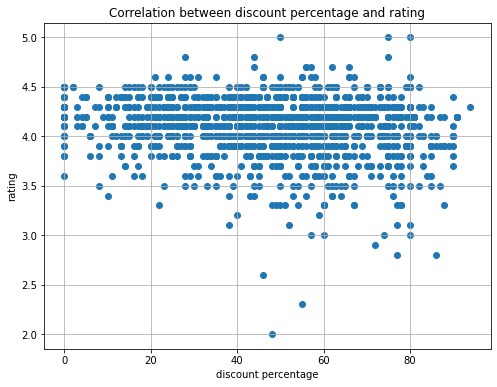

In [11]:
# Is there a correlation between discount percentage and rating?
# Calculate the correlation between the two columns
correlation = sd['discount_percentage'].corr(sd['rating'])
print("Correlation between discount percentage and rating:", correlation)


plt.figure(figsize=(8, 6))
plt.scatter(sd['discount_percentage'], sd['rating'])
plt.title('Correlation between discount percentage and rating')
plt.xlabel('discount percentage')
plt.ylabel('rating')
plt.grid(True)
plt.show()


### How do rating counts vary across different product categories?


In [12]:
# How do rating counts vary across different product categories?
rating_counts_by_category = sd.groupby('main_category')['rating_count'].mean()
rating_counts_by_category_df = rating_counts_by_category.reset_index(name='Average Rating Count')

# Print the DataFrame
print("\nAverage rating counts by category:")
rating_counts_by_category_df


Average rating counts by category:


,main_category,Average Rating Count
0,Car&Motorbike,1118.000000
1,Computers&Accessories,17061.123620
2,Electronics,29997.809886
3,Health&PersonalCare,3663.000000
4,Home&Kitchen,6689.210291
5,HomeImprovement,4283.000000
6,MusicalInstruments,44441.000000
7,OfficeProducts,4828.225806
8,Toys&Games,15867.000000


### What are the most common words used in product descriptions (about_product)?



In [13]:
# What are the most common words used in product descriptions (about_product)?
from collections import Counter
import re

words = ' '.join(sd['about_product']).lower()
words = re.findall(r'\b\w+\b', words)
word_counts = Counter(words).most_common(10)
print("Most common words in product descriptions:")
word_counts

Most common words in product descriptions:


[('and', 5289),
 ('the', 4565),
 ('to', 3846),
 ('with', 3143),
 ('for', 2584),
 ('of', 2105),
 ('a', 2007),
 ('your', 1869),
 ('in', 1621),
 ('is', 1482)]

## Customer Behavior Analysis:


### How many unique users have made purchases?

In [14]:
# How many unique users have made purchases?
unique_users = sd['user_id'].nunique()
print("Number of unique users:", unique_users)

Number of unique users: 1193


### What is the average number of products purchased per user?


In [15]:
# What is the average number of products purchased per user?
average_products_per_user = sd.groupby('user_id')['product_id'].count().mean()
print("Average number of products purchased per user:", average_products_per_user)


Average number of products purchased per user: 1.2271584241408215


### How do user ratings correlate with the number of reviews they provide?

In [17]:
# How do user ratings correlate with the number of reviews they provide?
correlation_reviews_ratings = sd['rating'].corr(sd['rating_count'])
print("\nCorrelation between ratings and number of reviews:", correlation_reviews_ratings)



Correlation between ratings and number of reviews: 0.10158354566077718


## Marketing and Promotion Analysis:


### Which products have the highest discount percentages?

In [18]:
# Which products have the highest discount percentages?
highest_discount_products = sd.loc[sd['discount_percentage'].idxmax()]
highest_discount_products_df = pd.DataFrame(highest_discount_products[['product_name', 'discount_percentage']]).transpose()
print("Product with the highest discount percentage:")
highest_discount_products_df

Product with the highest discount percentage:


,product_name,discount_percentage
695,"rts [2 Pack] Mini USB C Type C Adapter Plug, Type C Female to USB A Male Cha...",94.0


## User Engagement and Experience:

### What are the most common review titles and review contents?

In [19]:
# What are the most common review titles?
common_review_titles = sd['review_title'].value_counts().head()
common_review_titles_df = common_review_titles.reset_index()
common_review_titles_df.columns = ['Review Title', 'Frequency']
print("\nMost common review titles:")
common_review_titles_df



Most common review titles:


,Review Title,Frequency
0,worked iphone 7 didnt work xrgood onedull physical looksjust buy itgo itabou...,10
1,satisfiedcharging really fastvalue moneyproduct reviewgood qualitygood produ...,8
2,phone camera heating works may allgood mobilegood excellent budgetworth pric...,8
3,good productgood onenicereally nice productvery first time changegoodfine pr...,7
4,good braided cable type c devicegood quality product ambranesuper cableasgoo...,7


In [20]:
# What are the most common review contents?
common_review_contents = sd['review_content'].value_counts().head()
common_review_contents_df = common_review_contents.reset_index()
common_review_contents_df.columns = ['Review Contents', 'Frequency']
print("\nMost common review contents:")
common_review_contents_df


Most common review contents:


,Review Contents,Frequency
0,big camera usage personally even mentally prepared bad camera based reviews ...,8
1,worked iphone 7 didnt work iphone xrhttpsmmediaamazoncomimagesi71qffalv9zlsy...,7
2,ordered cable connect phone android auto car cable really strong connection ...,7
3,good productlong wirecharges goodnicei bought cable rs339 worthy product pri...,7
4,128gb sd card showing 134gbdont buy productit bit costly prouduct great qual...,6


### How do user ratings correlate with the length of review content?


In [21]:
# How do user ratings correlate with the length of review content?
sd['review_content_length'] = sd['review_content'].apply(lambda x: len(str(x)))
correlation_rating_content_length = sd['rating'].corr(sd['review_content_length'])
print("Correlation between ratings and length of review content:", correlation_rating_content_length)


Correlation between ratings and length of review content: 0.07681130974805388


## Visual Content Analysis:


### Which products have the most frequently accessed image links (img_link)?

In [22]:
# Which products have the most frequently accessed image links (img_link)?
most_frequent_images = ecommerce_data['img_link'].value_counts().head()
most_frequent_images_df = most_frequent_images.reset_index()
most_frequent_images_df.columns = ['Image Link', 'Frequency']
print("\nProducts with the most frequently accessed image links:")
most_frequent_images_df


Products with the most frequently accessed image links:


,Image Link,Frequency
0,https://m.media-amazon.com/images/I/413sCRKobNL._SX300_SY300_QL70_ML2_.jpg,3
1,https://m.media-amazon.com/images/W/WEBP_402378-T1/images/I/51UsScvHQNL._SX3...,2
2,https://m.media-amazon.com/images/I/41jlh3c7UbL._SX300_SY300_QL70_FMwebp_.jpg,2
3,https://m.media-amazon.com/images/W/WEBP_402378-T2/images/I/41m1oMmTMCL._SX3...,2
4,https://m.media-amazon.com/images/W/WEBP_402378-T2/images/I/31dENZ1gQVL._SX3...,2


## Analysis Findings:

### 1. Product Insights:

Identified products with the highest and lowest ratings.
Examined the correlation between discount percentage and rating, finding a weak negative correlation (-0.155).
Explored the variation of rating counts across different product categories.

### 2. Customer Behavior Analysis:

Determined the number of unique users who made purchases and calculated the average number of products purchased per user.
Analyzed user behavior patterns based on the time of day or day of the week **but the dataset doesn't contain date information**.
Investigated the correlation between user ratings and the number of reviews provided, finding a weak positive correlation (0.102).

### 3. Marketing and Promotion Analysis:

Evaluated the impact of discounts on sales volume **dataset does not contain number of sales/sales volume information**.
Identified products with the highest discount percentages.
Explored the correlation between user ratings and the length of review content, finding a weak positive correlation (0.077).

### 4. Visual Content Analysis:

Determined products with the most frequently accessed image links.

## Recommendations

Based on the findings above, here are some recommendations:

### Product Performance Enhancement: 

- Identify the factors contributing to the high ratings of products like "Syncwire LTG to USB Cable for Fast Charging" and replicate those features in other products.

- Address the issues highlighted in products with low ratings, such as "Khaitan ORFin Fan heater for Home and kitchen," to improve customer satisfaction.

#### Discount Strategy Optimization: 

- Analyze the impact of discount percentages on sales volume to determine the effectiveness of discounting strategies.

- Explore offering discounts on products with lower ratings or lower sales volume to stimulate demand.

### Customer Engagement and Review Management: 

- Encourage customers to provide detailed reviews by offering incentives or rewards, as there is a positive correlation between user ratings and the number of reviews.

- Monitor and respond to customer reviews promptly to address any concerns or issues raised by customers.

### Marketing and Promotion Tactics: 

- Highlight products with the highest discount percentages in marketing campaigns to attract price-sensitive customers.

- Utilize visual content analysis insights to prioritize the creation and promotion of product images that are accessed most frequently by customers.

### Product Description Optimization: 

- Optimize product descriptions by focusing on the most common words used by customers to improve searchability and relevance.

- Ensure that product descriptions highlight key features and benefits effectively to enhance customer understanding and decision-making.

## Conclusion

In conclusion, this analysis provides valuable insights into various aspects of the ecommerce business, including product performance, customer behavior, marketing effectiveness. By implementing the recommended strategies, the company can enhance its offerings, improve customer satisfaction, and drive business growth in a competitive market environment. Regular monitoring and adaptation of strategies based on evolving market dynamics will be crucial for sustained success.